# Whelks and lobsters -- context operator

In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

## The system

In [2]:
R.<x,y> = QQ[]

In [3]:
from lbuc import *

In [4]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [5]:
v3 = v2 # [RIF(1,1.1), RIF(4,5)]

In [6]:
Poly(y).var_names

NameError: name 'Poly' is not defined

In [7]:
Poly(x)

NameError: name 'Poly' is not defined

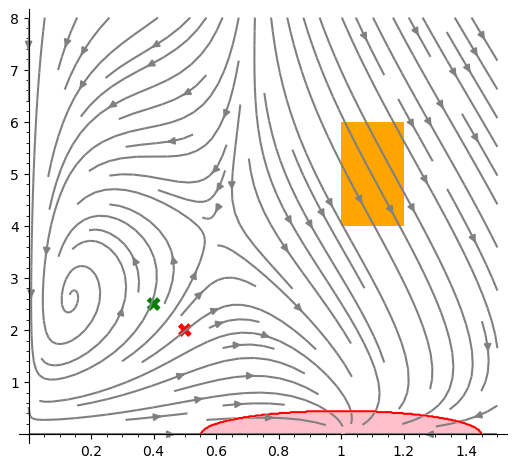

In [8]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [9]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 116 flowpipes in 0.5595997429918498 sec
mask for F = Mask([0.0000000000000000 .. 5.2020000000000009], [[0.10000000000000000 .. 5.2020000000000009]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f630a451a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.000000000

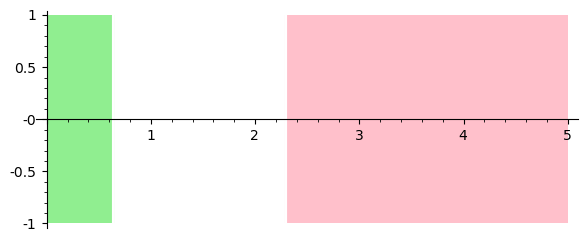

In [10]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f3b72480>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0

top-level root detection: 1 items in 0.21 seconds
roots = [[1.7005167865819657 .. 1.7066118696070954], [1.7262811029904936 .. 2.3231893582596551]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7005167865819657 .. 1.7066118696070954], 
 [1.7262811029904936 .. 2.3231893582596551]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7005167865819657 .. 1.7066118696070954], 
 [1.7262811029904936 .. 2.3231893582596551]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6262811029904936], True), ([2.2231893582596553 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6262811029904936], True), ([2.2231893582596553 .. 5.0000000000000000], False)], mask=None), reach_tree = None

top-level root detection: 1 items in 0.19 seconds
roots = [[1.8112978385496423 .. 2.0630741144280363]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8112978385496423 .. 2.0630741144280363]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8112978385496423 .. 2.0630741144280363]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7112978385496423], True), ([1.9630741144280363 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7112978385496423], True), ([1.9630741144280363 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2

top-level root detection: 1 items in 0.17 seconds
roots = [[1.7802782509036776 .. 1.7855153397905648], [1.7975625659520375 .. 2.2119548045131148]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7802782509036776 .. 1.7855153397905648], 
 [1.7975625659520375 .. 2.2119548045131148]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7802782509036776 .. 1.7855153397905648], 
 [1.7975625659520375 .. 2.2119548045131148]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6975625659520375], True), ([2.1119548045131151 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.6975625659520375], True), ([2.1119548045131151 .. 5.0000000000000000], False)], mask=None), reach_tree = 

top-level root detection: 1 items in 0.18 seconds
roots = [[1.6674096681669197 .. 1.6724545232073250], [1.6758165980377131 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6674096681669197 .. 1.6724545232073250], 
 [1.6758165980377131 .. 1.9965111094081805]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6674096681669197 .. 1.6724545232073250], 
 [1.6758165980377131 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5758165980377131], True), ([1.8965111094081805 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5758165980377131], True), ([1.8965111094081805 .. 5.0000000000000000], False)], mask=None), reach_tree = 

roots = [[1.5366187237674948 .. 1.5408504039251008], 
 [1.5606281778167709 .. 1.9631503234404911]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4606281778167710], True), ([1.8631503234404911 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4606281778167710], True), ([1.8631503234404911 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshol

top-level root detection: 1 items in 0.20 seconds
roots = [[1.1737138800607713 .. 1.9359992866628571]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1737138800607713 .. 1.9359992866628571]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1737138800607713 .. 1.9359992866628571]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0737138800607713], True), ([1.8359992866628571 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0737138800607713], True), ([1.8359992866628571 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2

top-level root detection: 1 items in 0.24 seconds
roots = [[1.4519364797965574 .. 1.4598704913626573], [1.4607409495063974 .. 1.9251498273954522]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4519364797965574 .. 1.4598704913626573], 
 [1.4607409495063974 .. 1.9251498273954522]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4519364797965574 .. 1.4598704913626573], 
 [1.4607409495063974 .. 1.9251498273954522]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3607409495063974], True), ([1.8251498273954522 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3607409495063974], True), ([1.8251498273954522 .. 5.0000000000000000], False)], mask=None), reach_tree = 

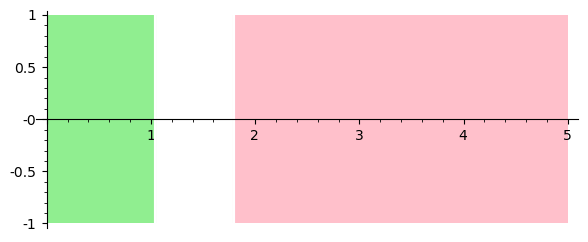

In [11]:
csig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=False,
)
sig = csig.refined_signal(2)
sig.plot()

In [12]:
sig = csig.refined_signal(4)
sig.plot()

 ==> creating ContextSignal with coord=(0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f3b72480>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=None
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^

top-level root detection: 1 items in 0.14 seconds
roots = [[2.1693079241141548 .. 2.2605097003779165]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1693079241141548 .. 2.2605097003779165]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1693079241141548 .. 2.2605097003779165]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0693079241141548], True), ([2.1605097003779167 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0693079241141548], True), ([2.1605097003779167 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 3), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.11 seconds
roots = [[2.1999083046519745 .. 2.2798788171603333]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1999083046519745 .. 2.2798788171603333]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1999083046519745 .. 2.2798788171603333]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0999083046519745], True), ([2.1798788171603336 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0999083046519745], True), ([2.1798788171603336 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1, 2), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.13 seconds
roots = [[2.1104335349410017 .. 2.1981579708261170]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1104335349410017 .. 2.1981579708261170]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1104335349410017 .. 2.1981579708261170]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0104335349410017], True), ([2.0981579708261173 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0104335349410017], True), ([2.0981579708261173 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2, 1), signal = functools.partial(<bound method Atomic.sig

top-level root detection: 1 items in 0.15 seconds
roots = [[2.0274657798135633 .. 2.1765640379868910]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0274657798135633 .. 2.1765640379868910]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0274657798135633 .. 2.1765640379868910]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9274657798135633], True), ([2.0765640379868912 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9274657798135633], True), ([2.0765640379868912 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3, 0), signal = functools.partial(<bound method Atomic.signal_fn

top-level root detection: 1 items in 0.16 seconds
roots = [[2.0361100867600705 .. 2.1162308666978623]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0361100867600705 .. 2.1162308666978623]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0361100867600705 .. 2.1162308666978623]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9361100867600705], True), ([2.0162308666978625 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9361100867600705], True), ([2.0162308666978625 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0), signal = functools.partial(<bound method Atomic.signal

top-level root detection: 1 items in 0.11 seconds
roots = [[2.1250209931828529 .. 2.2119269031427767]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1250209931828529 .. 2.2119269031427767]]
seg_domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1250209931828529 .. 2.2119269031427767]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0250209931828529], True), ([2.1119269031427769 .. 5.0019999999999998], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 2.0250209931828529], True), ([2.1119269031427769 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0, 3), signal = functools.partial(<bound method Atomic.sig

limit_output extension: Maximum message size of 100000 exceeded with 103120 characters

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 116 flowpipes in 0.6182348030852154 sec
mask for F = Mask([0.0000000000000000 .. 5.2000000000000002], [[0.59999999999999997 .. 1.2000000000000002], [3.0999999999999996 .. 4.2000000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_un

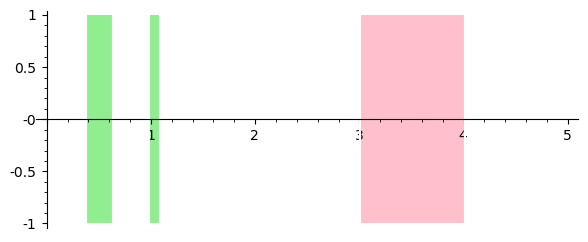

In [13]:
sig = F(RIF(0.1, 0.2), P).signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
    mask=Mask(RIF(0, 5), [RIF(0.5, 1), RIF(3, 4)]),
)
sig.plot()

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 115 flowpipes in 0.8246724740602076 sec
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 5.0020000000000007], [[0.0000000000000000 .. 5.0020000000000007]]))
fprime = 0.59999999999999998?*

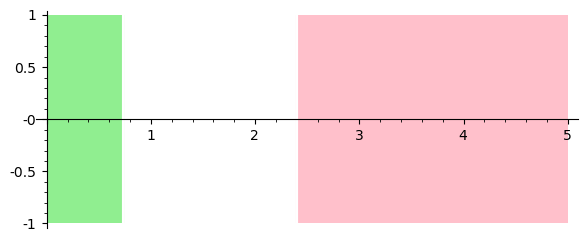

In [14]:
sig = P.signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
sig.plot()

In [15]:
P

Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25c37c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0

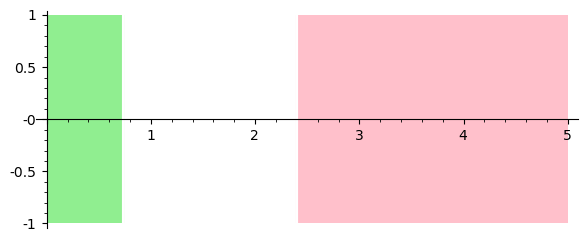

In [16]:
ctx_sig = P.context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25c37c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f63080f5f70>
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001

top-level root detection: 1 items in 0.23 seconds
roots = [[1.8175205098229647 .. 2.1362934199498778]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8175205098229647 .. 2.1362934199498778]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8175205098229647 .. 2.1362934199498778]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8175205098229648], True), ([2.1362934199498777 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.001000

top-level root detection: 1 items in 0.22 seconds
roots = [[1.8776366118439304 .. 1.8809885387125629], [1.8969674674333496 .. 2.2208617178276052]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8776366118439304 .. 1.8809885387125629], 
 [1.8969674674333496 .. 2.2208617178276052]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8776366118439304 .. 1.8809885387125629], 
 [1.8969674674333496 .. 2.2208617178276052]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8776366118439305], True), ([1.8809885387125628 .. 1.8969674674333497], True), ([2.2208617178276051 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = functools.partial(<bound method Atomic.si

top-level root detection: 1 items in 0.22 seconds
roots = [[1.7422790888637402 .. 1.7441849506468428], [1.7540629141701296 .. 2.0100247855478531]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.7422790888637402 .. 1.7441849506468428], 
 [1.7540629141701296 .. 2.0100247855478531]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.7422790888637402 .. 1.7441849506468428], 
 [1.7540629141701296 .. 2.0100247855478531]]
signal given bool roots: 1 items in 0.02 seconds
 ==> creating ContextSignal with coord=(1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7422790888637403], True), ([1.7441849506468427 .. 1.7540629141701297], True), ([2.0100247855478530 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3), signal = functools.partial(<bound method Atomic.si

top-level root detection: 1 items in 0.29 seconds
roots = [[1.0794594046476739 .. 2.1362934199498778]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0794594046476739 .. 2.1362934199498778]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0794594046476739 .. 2.1362934199498778]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0794594046476740], True), ([2.1362934199498777 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000

top-level root detection: 1 items in 0.30 seconds
roots = [[1.1737138800607713 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1737138800607713 .. 1.9965111094081805]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1737138800607713 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1737138800607714], True), ([1.9965111094081804 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.001000

top-level root detection: 1 items in 0.23 seconds
roots = [[1.5311042587510899 .. 1.9161118949634315]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.5311042587510899 .. 1.9161118949634315]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.5311042587510899 .. 1.9161118949634315]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.5311042587510900], True), ([1.9161118949634314 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.001000

top-level root detection: 1 items in 0.33 seconds
roots = [[1.1466824845048926 .. 1.9359992866628571], [1.9719741752660966 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1466824845048926 .. 1.9359992866628571], 
 [1.9719741752660966 .. 1.9965111094081805]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1466824845048926 .. 1.9359992866628571], 
 [1.9719741752660966 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.1466824845048927], True), ([1.9359992866628570 .. 1.9719741752660967], False), ([1.9965111094081804 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None


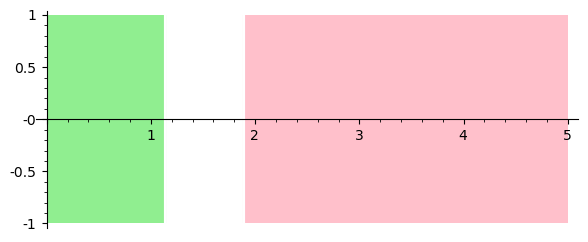

In [17]:
ctx_sig.refined_signal(2).plot()

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25f3880>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0

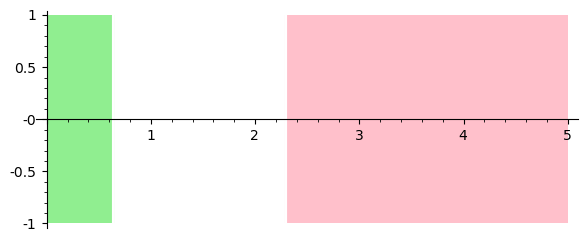

In [18]:
ctx_sig = F(RIF(0.1, 0.2), P).context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25f3880>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f268dd60>
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001

top-level root detection: 1 items in 0.28 seconds
roots = [[1.0794594046476739 .. 2.1362934199498778]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.0794594046476739 .. 2.1362934199498778]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.0794594046476739 .. 2.1362934199498778]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.97945940464767390], True), ([2.0362934199498781 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.97945940464767390], True), ([2.0362934199498781 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.00000000000000

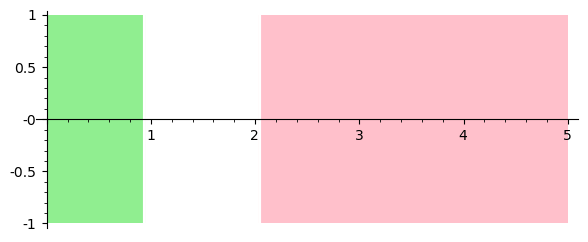

In [19]:
ctx_sig.refined_signal(1).plot()

 ==> creating ContextSignal with coord=(0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25f3880>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f3be2c10>
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.48000000

top-level root detection: 1 items in 0.21 seconds
roots = [[1.8112978385496423 .. 2.0630741144280363]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8112978385496423 .. 2.0630741144280363]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.8112978385496423 .. 2.0630741144280363]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7112978385496423], True), ([1.9630741144280363 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7112978385496423], True), ([1.9630741144280363 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

top-level root detection: 1 items in 0.19 seconds
roots = [[1.7802782509036776 .. 1.7855153397905648], [1.7975625659520375 .. 2.2119548045131148]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7802782509036776 .. 1.7855153397905648], 
 [1.7975625659520375 .. 2.2119548045131148]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.7802782509036776 .. 1.7855153397905648], 
 [1.7975625659520375 .. 2.2119548045131148]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6975625659520375], True), ([2.1119548045131151 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.69756256595203

top-level root detection: 1 items in 0.18 seconds
roots = [[1.6674096681669197 .. 1.6724545232073250], [1.6758165980377131 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.6674096681669197 .. 1.6724545232073250], 
 [1.6758165980377131 .. 1.9965111094081805]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.6674096681669197 .. 1.6724545232073250], 
 [1.6758165980377131 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.5758165980377131], True), ([1.8965111094081805 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.57581659803771

top-level root detection: 1 items in 0.22 seconds
roots = [[1.1737138800607713 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1737138800607713 .. 1.9965111094081805]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.1737138800607713 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0737138800607713], True), ([1.8965111094081805 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0737138800607713], True), ([1.8965111094081805 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000000000

top-level root detection: 1 items in 0.20 seconds
roots = [[1.4519364797965574 .. 1.4598704913626573], [1.4607409495063974 .. 1.9251498273954522]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.4519364797965574 .. 1.4598704913626573], 
 [1.4607409495063974 .. 1.9251498273954522]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.4519364797965574 .. 1.4598704913626573], 
 [1.4607409495063974 .. 1.9251498273954522]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.3607409495063974], True), ([1.8251498273954522 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.36074094950639

top-level root detection: 1 items in 0.23 seconds
roots = [[1.1466824845048926 .. 1.9359992866628571], [1.9719741752660966 .. 1.9965111094081805]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.1466824845048926 .. 1.9359992866628571], 
 [1.9719741752660966 .. 1.9965111094081805]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.1466824845048926 .. 1.9359992866628571], 
 [1.9719741752660966 .. 1.9965111094081805]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.0466824845048926], True), ([1.8965111094081805 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.04668248450489

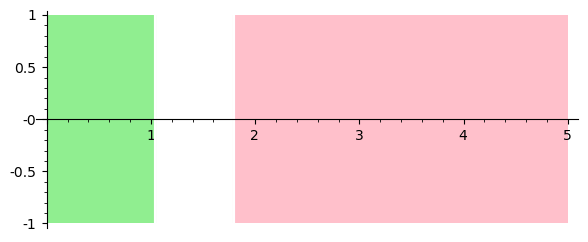

In [20]:
ctx_sig.refined_signal(2).plot()

In [21]:
ctx_sig.refined_signal(3).plot()

 ==> creating ContextSignal with coord=(0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.200000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f25f3880>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f268d970>
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.48000

top-level root detection: 1 items in 0.14 seconds
roots = [[2.0274657798135633 .. 2.1765640379868910]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0274657798135633 .. 2.1765640379868910]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0274657798135633 .. 2.1765640379868910]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9274657798135633], True), ([2.0765640379868912 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9274657798135633], True), ([2.0765640379868912 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.13 seconds
roots = [[2.0868482250630600 .. 2.2442976249621416]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0868482250630600 .. 2.2442976249621416]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0868482250630600 .. 2.2442976249621416]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9868482250630600], True), ([2.1442976249621419 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9868482250630600], True), ([2.1442976249621419 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.14 seconds
roots = [[1.9841516764179520 .. 2.1362934199498778]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9841516764179520 .. 2.1362934199498778]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9841516764179520 .. 2.1362934199498778]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8841516764179521], True), ([2.0362934199498781 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8841516764179521], True), ([2.0362934199498781 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.17 seconds
roots = [[1.9271989783925127 .. 2.0682728928868102]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9271989783925127 .. 2.0682728928868102]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9271989783925127 .. 2.0682728928868102]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8271989783925127], True), ([1.9682728928868102 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8271989783925127], True), ([1.9682728928868102 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.8513860434610287 .. 1.9804221798817166]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8513860434610287 .. 1.9804221798817166]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.8513860434610287 .. 1.9804221798817166]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7513860434610287], True), ([1.8804221798817166 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7513860434610287], True), ([1.8804221798817166 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.15 seconds
roots = [[1.8379499487588513 .. 1.9553744176862240]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8379499487588513 .. 1.9553744176862240]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.8379499487588513 .. 1.9553744176862240]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7379499487588513], True), ([1.8553744176862241 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7379499487588513], True), ([1.8553744176862241 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.14 seconds
roots = [[2.0472907895490375 .. 2.2208617178276052]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0472907895490375 .. 2.2208617178276052]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0472907895490375 .. 2.2208617178276052]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9472907895490375], True), ([2.1208617178276054 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9472907895490375], True), ([2.1208617178276054 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.9625110463019554 .. 2.1176124238362105]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9625110463019554 .. 2.1176124238362105]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9625110463019554 .. 2.1176124238362105]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8625110463019555], True), ([2.0176124238362107 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8625110463019555], True), ([2.0176124238362107 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.14 seconds
roots = [[1.9761972435357464 .. 2.1765640379868910]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9761972435357464 .. 2.1765640379868910]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9761972435357464 .. 2.1765640379868910]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8761972435357464], True), ([2.0765640379868912 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8761972435357464], True), ([2.0765640379868912 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

top-level root detection: 1 items in 0.15 seconds
roots = [[1.8950496835447412 .. 2.0703704965344945]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8950496835447412 .. 2.0703704965344945]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.8950496835447412 .. 2.0703704965344945]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7950496835447412], True), ([1.9703704965344945 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.7950496835447412], True), ([1.9703704965344945 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.000000

limit_output extension: Maximum message size of 100000 exceeded with 107037 characters

phi variables sfs = {x}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x - 1.15000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f265b3c0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f62f2649e50>, ctx_mask=<lbuc.co

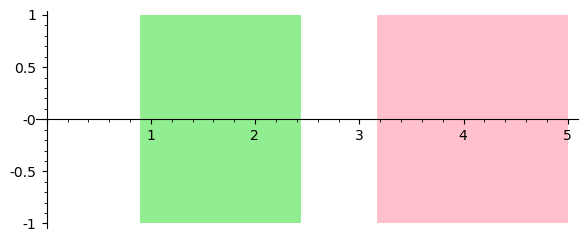

In [22]:
ctx_sig = Atomic(x - 1.15).context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

In [23]:
prop = (F(RIF(0.1, 0.2), P) & Atomic(x - 1.15))
prop

And([F([0.10000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)), Atomic(x - 1.15000000000000)])

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f2a48310>
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flows

top-level root detection: 1 items in 0.23 seconds
roots = [[0.0000000000000000 .. 0.86802860497076651], [0.88067123177896866 .. 0.88956119414532109]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[0.0000000000000000 .. 0.86802860497076651], 
 [0.88067123177896866 .. 0.88956119414532109]]
seg_domain = [0.0000000000000000 .. 2.2917046091295048]
roots = [[0.0000000000000000 .. 0.86802860497076651], 
 [0.88067123177896866 .. 0.88956119414532109]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([2.2917046091295047 .. 5.2020000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
Monitoring initial signal: 1 items in 2.30 seconds
(ContextSignal([0.0000000000000000 .. 5.2020000000000000], [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], [[-1 .. 1], [-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7f62f3b9ab20>)).to_domain(1.?e1)
 ==> c

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


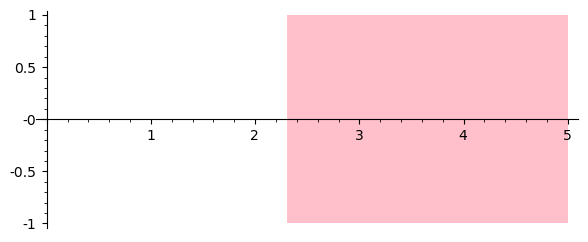

In [24]:
ctx_sig = prop.context_signal_for_system(
    vf, v3, 5, order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True,
    use_masks=True,
)
ctx_sig.signal.plot()

 ==> creating ContextSignal with coord=(0,), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f26498b0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 5.0019999999999998], [])
parent_signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([0.0000000000000000 .. 5.2020000000000000], True)], mask=None)
 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f3bb8a00>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = No

top-level root detection: 1 items in 0.21 seconds
roots = [[1.5486182410542548 .. 2.2510041035354358]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5486182410542548 .. 2.2510041035354358]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.5486182410542548 .. 2.2510041035354358]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4486182410542548], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4486182410542548], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000

top-level root detection: 1 items in 0.25 seconds
roots = [[1.0411171183020504 .. 2.0843844214072953]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.0411171183020504 .. 2.0843844214072953]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.0411171183020504 .. 2.0843844214072953]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.94111711830205036], True), ([1.9843844214072954 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.94111711830205036], True), ([1.9843844214072954 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.00000000000000

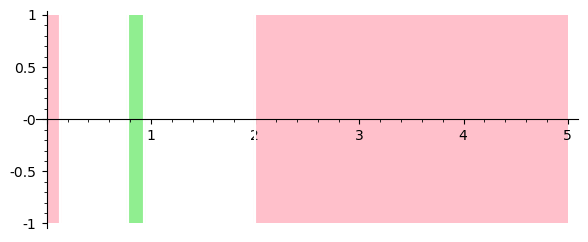

In [25]:
ctx_sig.refined_signal(1).plot()

In [26]:
sig = ctx_sig.refined_signal(2)

 ==> creating ContextSignal with coord=(0, 0), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f630821f070>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 5.0019999999999998], [[5.0019999999999997 .. 5.0019999999999998]])
parent_signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([0.0000000000000000 .. 5.0019999999999998], True)], mask=Mask([0.0000000000000000 .. 5.2020000000000000], [[0.0000000000000000 .. 5.0019999999999998]]))
 ==> creating ContextSignal with coord=(0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetr

top-level root detection: 1 items in 0.17 seconds
roots = [[1.9813372740446735 .. 2.2774212318418501]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9813372740446735 .. 2.2774212318418501]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9813372740446735 .. 2.2774212318418501]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8813372740446735], True), ([2.1774212318418504 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8813372740446735], True), ([2.1774212318418504 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.11101718749999996 .. 0.32487130229675826]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[0.11101718749999996 .. 0.32487130229675826]]
seg_domain = [0.0000000000000000 .. 1.9511126638671386]
roots = [[0.11101718749999996 .. 0.32487130229675826]]
seg_domain = [5.0019999999999997 .. 5.0019999999999998]
roots = [[0.11101718749999996 .. 0.32487130229675826]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.11101718749999997], False), ([0.32487130229675825 .. 1.6965594891320921], True), ([1.9511126638671385 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0

top-level root detection: 1 items in 0.21 seconds
roots = [[1.7862184091373445 .. 2.1923684401141333]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.7862184091373445 .. 2.1923684401141333]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.7862184091373445 .. 2.1923684401141333]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6862184091373445], True), ([2.0923684401141335 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.6862184091373445], True), ([2.0923684401141335 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000000000

top-level root detection: 1 items in 0.17 seconds
roots = [[1.5556284362069363 .. 1.5579710201261683], [1.5717739918162749 .. 1.9592005881029071]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.5556284362069363 .. 1.5579710201261683], 
 [1.5717739918162749 .. 1.9592005881029071]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.5556284362069363 .. 1.5579710201261683], 
 [1.5717739918162749 .. 1.9592005881029071]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.4717739918162749], True), ([1.8592005881029072 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.47177399181627

seg_domain = [0.0000000000000000 .. 1.8248188706339735]
roots = [[0.0000000000000000 .. 0.13618140625000009]]
seg_domain = [5.0019999999999997 .. 5.0019999999999998]
roots = [[0.0000000000000000 .. 0.13618140625000009]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.13618140625000008 .. 1.4767499153641557], True), ([1.8248188706339734 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.13618140625000008 .. 1.4767499153641557], True), ([1.8248188706339734 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal wit

top-level root detection: 1 items in 0.25 seconds
roots = [[1.2005978056155397 .. 1.9248188706339733]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.2005978056155397 .. 1.9248188706339733]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.2005978056155397 .. 1.9248188706339733]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.1005978056155397], True), ([1.8248188706339734 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.1005978056155397], True), ([1.8248188706339734 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000000000

limit_output extension: Maximum message size of 100000 exceeded with 102214 characters

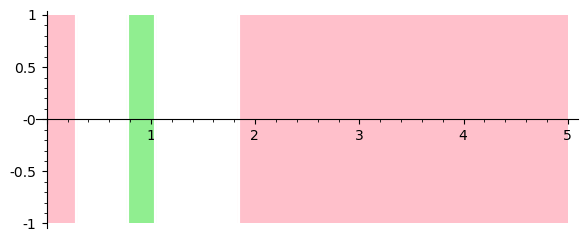

In [27]:
sig.plot()

In [28]:
sig = ctx_sig.refined_signal(3)

 ==> creating ContextSignal with coord=(0, 0, 0), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f63080f5eb0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 5.0019999999999998], [[5.0019999999999997 .. 5.0019999999999998]])
parent_signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([0.0000000000000000 .. 5.0019999999999998], True)], mask=Mask([0.0000000000000000 .. 5.2020000000000000], [[0.0000000000000000 .. 5.0019999999999998]]))
 ==> creating ContextSignal with coord=(0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.Aggrega

observer = <flowstar.observers.RestrictedObserver object at 0x7f63081de040>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.15 seconds
roots = [[2.0377890255323012 .. 2.0386223554561443], [2.0436526146391411 .. 2.2003891362335755]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0377890255323012 .. 2.0386223554561443], 
 [2.0436526146391411 .. 2.2003891362335755]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0377890255323012 .. 2.0386223554561443], 
 [2.0436526146391411 .. 2.2003891362335755]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 0, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9436526146391411], True), ([2.1003891362335758 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating Co

top-level root detection: 1 items in 0.14 seconds
roots = [[2.0281077310153694 .. 2.1900947937544540]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0281077310153694 .. 2.1900947937544540]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0281077310153694 .. 2.1900947937544540]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9281077310153694], True), ([2.0900947937544542 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9281077310153694], True), ([2.0900947937544542 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000

top-level root detection: 1 items in 0.15 seconds
roots = [[2.0909269179702087 .. 2.2510041035354358]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0909269179702087 .. 2.2510041035354358]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0909269179702087 .. 2.2510041035354358]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9909269179702088], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9909269179702088], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000

top-level root detection: 1 items in 0.16 seconds
roots = [[1.9911434405188277 .. 2.1347226939535613]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.9911434405188277 .. 2.1347226939535613]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.9911434405188277 .. 2.1347226939535613]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8911434405188277], True), ([2.0347226939535616 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.8911434405188277], True), ([2.0347226939535616 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000

res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^2) + ([-0.1000000001 , -0.1000000000] * y^3) + ([3.2000000000 , 3.2000000001] * x * y^2) + ([-1.0800000001 , -1.0799999999] * x^2 * y) + ([-1.2000000000 , -1.1999999999] * x^3) + ([-4.0000000000 , -4.0000000000] * x^2 * y^2) + ([0.5999999999 , 0.6000000000] * x^3 * y))'
PolyObserver((([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2)), <flowstar.reachability.Reach object at 0x7f630a4515e0>, (([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.39999999

top-level root detection: 1 items in 0.15 seconds
roots = [[1.8509462799026947 .. 1.9957333198664174]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[1.8509462799026947 .. 1.9957333198664174]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[1.8509462799026947 .. 1.9957333198664174]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7509462799026947], True), ([1.8957333198664174 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.7509462799026947], True), ([1.8957333198664174 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.000000

limit_output extension: Maximum message size of 100000 exceeded with 102618 characters

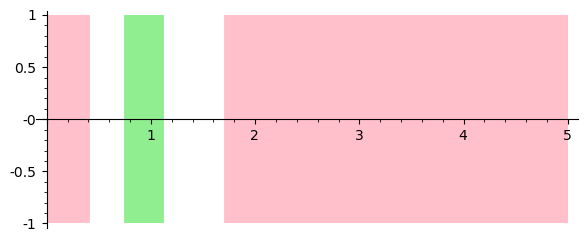

In [29]:
sig.plot()

In [30]:
sig = ctx_sig.refined_signal(4)

 ==> creating ContextSignal with coord=(0, 0, 0, 0), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f22e7eb0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 5.0019999999999998], [[5.0019999999999997 .. 5.0019999999999998]])
parent_signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([0.0000000000000000 .. 5.0019999999999998], True)], mask=Mask([0.0000000000000000 .. 5.2020000000000000], [[0.0000000000000000 .. 5.0019999999999998]]))
 ==> creating ContextSignal with coord=(0, 0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.A

top-level root detection: 1 items in 0.14 seconds
roots = [[2.2200100271613281 .. 2.3153662980618042]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.2200100271613281 .. 2.3153662980618042]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.2200100271613281 .. 2.3153662980618042]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1200100271613281], True), ([2.2153662980618045 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1200100271613281], True), ([2.2153662980618045 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.

top-level root detection: 1 items in 0.13 seconds
roots = [[2.1627678444418179 .. 2.2510041035354358]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1627678444418179 .. 2.2510041035354358]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.1627678444418179 .. 2.2510041035354358]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0627678444418179], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0627678444418179], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.

top-level root detection: 1 items in 0.01 seconds
roots = [[0.48851040152041819 .. 0.63179712936410426]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[0.48851040152041819 .. 0.63179712936410426]]
seg_domain = [0.0000000000000000 .. 2.1993799933819345]
roots = [[0.48851040152041819 .. 0.63179712936410426]]
seg_domain = [5.0019999999999997 .. 5.0019999999999998]
roots = [[0.48851040152041819 .. 0.63179712936410426]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.48851040152041820], False), ([0.63179712936410425 .. 2.1086986078234849], True), ([2.1993799933819344 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000

top-level root detection: 1 items in 0.13 seconds
roots = [[2.1525730620771019 .. 2.2392229824660928]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1525730620771019 .. 2.2392229824660928]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.1525730620771019 .. 2.2392229824660928]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0525730620771019], True), ([2.1392229824660931 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0525730620771019], True), ([2.1392229824660931 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.

top-level root detection: 1 items in 0.14 seconds
roots = [[2.1148641344502308 .. 2.1960661386428098]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1148641344502308 .. 2.1960661386428098]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.1148641344502308 .. 2.1960661386428098]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0148641344502308], True), ([2.0960661386428101 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0148641344502308], True), ([2.0960661386428101 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.

top-level root detection: 1 items in 0.14 seconds
roots = [[2.0630707065914752 .. 2.1392397628466729]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.0630707065914752 .. 2.1392397628466729]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.0630707065914752 .. 2.1392397628466729]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9630707065914753], True), ([2.0392397628466731 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 2, 2), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 1.9630707065914753], True), ([2.0392397628466731 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.

limit_output extension: Maximum message size of 100000 exceeded with 102604 characters

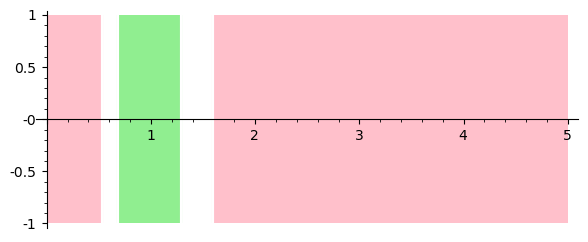

In [31]:
sig.plot()

In [32]:
sig = ctx_sig.refined_signal(5)

 ==> creating ContextSignal with coord=(0, 0, 0, 0, 0), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f63081778e0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 5.0019999999999998], [[5.0019999999999997 .. 5.0019999999999998]])
parent_signal = Signal([0.0000000000000000 .. 5.2020000000000000], [([0.0000000000000000 .. 5.0019999999999998], True)], mask=Mask([0.0000000000000000 .. 5.2020000000000000], [[0.0000000000000000 .. 5.0019999999999998]]))
 ==> creating ContextSignal with coord=(0, 0, 0, 0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumenta

top-level root detection: 1 items in 0.18 seconds
roots = [[2.2630976661740427 .. 2.3147040710970979]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.2630976661740427 .. 2.3147040710970979]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.2630976661740427 .. 2.3147040710970979]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1630976661740427], True), ([2.2147040710970982 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 0, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1630976661740427], True), ([2.2147040710970982 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995]

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5999999999 , 0.6000000000] * x) + ([-0.2400000001 , -0.2399999999] * x * y) + ([-0.6000000000 , -0.5999999999] * x^2) + ([0.2999999999 , 0.3000000000] * x^2 * y))'
PolyObserver((([-1.1500000000 , -1.1499999999]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7f630a4515e0>, (([0.5999999999 , 0.6000000000] * x) + ([-0.2400000001 , -0.2399999999] * x * y) + ([-0.6000000000 , -0.5999999999] * x^2) + ([0.2999999999 , 0.3000000000] * x^2 * y)), symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 2.1859354112130621], [5.0019999999999997 .. 5.0019999999999998]]))
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5999999999 , 0.6000000000] * x) + ([-0.2400000001 , -0.2399999999] * x * y) + ([-0.6000000000 , -0.5999999999] * x^2) + ([0.2999999999 , 0.3000000000] * x^2 * y))'
fprime = (([0.599999999

top-level root detection: 1 items in 0.15 seconds
roots = [[2.2580404424687889 .. 2.3081303448255857]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.2580404424687889 .. 2.3081303448255857]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.2580404424687889 .. 2.3081303448255857]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1580404424687889], True), ([2.2081303448255860 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 0), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1580404424687889], True), ([2.2081303448255860 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995]

 ==> creating ContextSignal with coord=(0, 0, 0, 1, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 0.55567199883825447], False), ([0.63550026837486395 .. 2.1533809579803780], True), ([2.2014162304219722 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.55567199883825447], False), ([0.63550026837486395 .. 2.1533809579803780], True), ([2.2014162304219722 .. 5.0000000000000000], False)], mask=Mask([0.0000000000000000 .. 5.0000000000000000], [[0.0000000000000000 .. 5.0000000000000000]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 2), signal = <function base_context_signal.<locals>.<lambda> at 0x7f62f3bb4dc0>, reach_tree = None, ctx_mask=<lbuc.context

top-level root detection: 1 items in 0.16 seconds
roots = [[2.2243203655313377 .. 2.2673423462005192]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.2243203655313377 .. 2.2673423462005192]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.2243203655313377 .. 2.2673423462005192]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1243203655313377], True), ([2.1673423462005194 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 1, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1243203655313377], True), ([2.1673423462005194 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995]

top-level root detection: 1 items in 0.13 seconds
roots = [[2.2041404772229973 .. 2.2510041035354358]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.2041404772229973 .. 2.2510041035354358]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.2041404772229973 .. 2.2510041035354358]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1041404772229973], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 2, 1), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.1041404772229973], True), ([2.1510041035354361 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995]

top-level root detection: 1 items in 0.13 seconds
roots = [[2.1748133255988695 .. 2.2197654052086016]]
domain = [0.0000000000000000 .. 5.2020000000000000]
roots = [[2.1748133255988695 .. 2.2197654052086016]]
seg_domain = [0.10000000000000000 .. 5.2020000000000000]
roots = [[2.1748133255988695 .. 2.2197654052086016]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0, 0, 0, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0748133255988695], True), ([2.1197654052086019 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995], [[0.0000000000000000 .. 5.0019999999999998]])), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 0, 2, 3), signal = Signal([0.0000000000000000 .. 5.1019999999999995], [([0.0000000000000000 .. 2.0748133255988695], True), ([2.1197654052086019 .. 5.0019999999999998], False)], mask=Mask([0.0000000000000000 .. 5.1019999999999995]

limit_output extension: Maximum message size of 100000 exceeded with 111298 characters

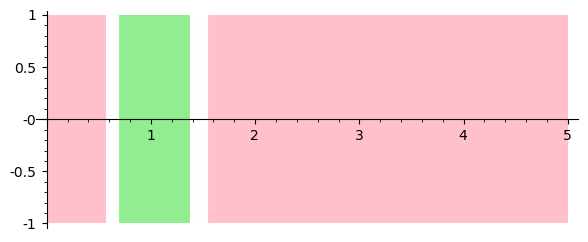

In [33]:
sig.plot()

### Polynomial plot

In [34]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

NameError: name 'reach' is not defined

## Context

In [34]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (vf, v3, 7)

In [35]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

C({x: [0.050000000000000002 .. 0.10000000000000001]}, G([0.0000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)))

In [36]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 143 flowpipes in 0.6266323420568369 sec
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0876194686193838 .. 1.5959882046269048], [0.061157558039720075 .. 3.3284170622891658]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0876194686193838 .. 1.5959882046269048], [0.43897516815004844 .. 3.3284170622891658]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
syst

Computed 12 flowpipes in 0.06606040400220081 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 11 flowpipes in 0.05789173598168418 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 8 flowpipes in 0.04418407299090177 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.0349521369789727 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000000

Computed 6 flowpipes in 0.034238566004205495 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 4 flowpipes in 0.028086222999263555 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02126766199944541 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

limit_output extension: Maximum message size of 100000 exceeded with 103553 characters

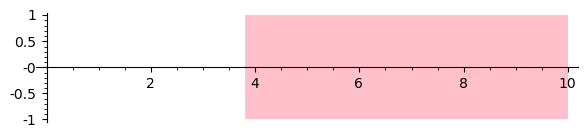

In [37]:
sig.plot()

In [38]:
sigM = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, use_masks=True, **kwargs)
sigM

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 143 flowpipes in 0.609753453056328 sec
mask for ctx = Mask([0.0000000000000000 .. 10.002000000000001], [[0.0000000000000000 .. 10.002000000000001]])
mask = Mask([0.0000000000000000 .. 10.002000000000001], [[0.0000000000000000 .. 10.002000000000001]])
mask = Mask([0.0000000000000000 .. 10.002000000000001], [[0.0000000000000000 .. 10.002000000000001]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0618522982648672 .. 1.5719639955222958], [1.1328194291313433 .. 4.0053092288128643]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0618522982648672 .. 1.5471954628100999], [1.3947384837273815 .. 4.0053092288128643]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system 

Computed 14 flowpipes in 0.07336464402033016 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_dom

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1024292680261309 .. 1.5265972538243283], [-0.18566626515230495 .. 1.5500523120235264]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.06313097005477175 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000

Computed 11 flowpipes in 0.06525422300910577 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_dom

Computed 8 flowpipes in 0.0421833919826895 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domai

Computed 6 flowpipes in 0.036888703994918615 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_dom

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1369554408584487 .. 1.3417562404987085], [-0.16532227837489025 .. 0.71911602423514443]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.03894428099738434 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .

Computed 4 flowpipes in 0.02655655302805826 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_doma

limit_output extension: Maximum message size of 100000 exceeded with 103193 characters

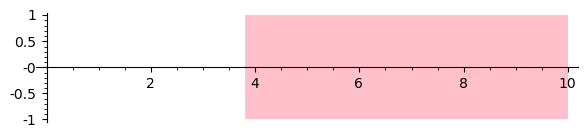

In [39]:
sigM.plot()

In [40]:
sigM.mask

Mask([0.0000000000000000 .. 10.000000000000000], [[0.0000000000000000 .. 10.000000000000000]])

In [41]:
%%time
sigG = G(RIF(10.2, 10.3), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 145 flowpipes in 0.6163145780446939 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0927060926435441 .. 1.5959882046269048], [0.032449403620072023 .. 3.2415777058479863]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0927060926435441 .. 1.5959882046269048], [0.39602639216531310 .. 3.2415777058479863]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
syst

Computed 12 flowpipes in 0.06711361499037594 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 11 flowpipes in 0.06060417299158871 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 8 flowpipes in 0.04425957199418917 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1404270341552626 .. 1.3858356751351442], [-0.18566626515230495 .. 0.86677314325231470]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.04480880603659898 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1325307054923710 .. 1.3256018758809416], [-0.16782264686514459 .. 0.66704331148222651]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.03554145997622982 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 3 flowpipes in 0.022803478001151234 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

limit_output extension: Maximum message size of 100000 exceeded with 101870 characters

In [42]:
sigG(0)

False

In [43]:
%%time
sigG = G(RIF(10.2, 10.3), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 145 flowpipes in 0.6058354120468721 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 10.302000000000002], [[10.199999999999999 .. 10.302000000000002]])
mask for ctx = Mask([0.0000000000000000 .. 10.302000000000002], [[10.199999999999999 .. 10.302000000000002]])
mask = Mask([0.0000000000000000 .. 10.302000000000002], [[10.199999999999999 .. 10.302000000000002]])
mask = Mask([0.0000000000000000 .. 10.302000000000002], [[10.199999999999999 .. 10.302000000000002]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99904786189732996 .. 1.0056246182309452], [-0.0062191321833736432 .. 0.010711199615616

In [44]:
%%time
sigG = F(RIF(5, 5.1),
         {y: RIF(1, 1.5)} >>
         G(RIF(10.2, 10.3),
           {x: RIF(0.05,0.1)} >>
            G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 115 flowpipes in 0.5345451320172288 sec
mask for F = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99998486618648119 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 1.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0876194686193838 .. 1.5959882046269048], [0.42853433616268721 .. 3.3054759432359294]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0876194686193838 .. 1.5959882046269048], [0.70353768107801073 .. 3.3054759432359294]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 1.?e1)]
phi variables sfs = {x, y}
system sfs = 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1178681264950920 .. 1.6435097538016559], [0.37976814330932157 .. 3.1439456816196279]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0963147871197924 .. 1.6757643903041968], [0.066515811387745177 .. 2.8784397942601370]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
syst

top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0818274713698023 .. 1.6356626199496154], [-0.29981565914416148 .. 1.7231668725461780]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 15 flowpipes in 0.07415755500551313 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 12 flowpipes in 0.06128722301218659 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 9 flowpipes in 0.059362250030972064 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 7 flowpipes in 0.040766934980638325 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0436453873006348 .. 1.3401805813853736], [-0.26459020258172162 .. 0.58943040369642342]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.035301134979818016 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0437854625392517 .. 1.2910611036873821], [-0.21899795180955792 .. 0.47621485781371015]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.0337147549726069 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0270667939638105 .. 1.2328103878327224], [-0.18901249196958095 .. 0.36757397638261774]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 3 flowpipes in 0.03098681301344186 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0173727930555920 .. 1.1968013313649560], [-0.16894037058832915 .. 0.30821884386493504]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.023828122997656465 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0215396499059199 .. 1.1754607557102439], [-0.14149374998488496 .. 0.26764886994132287]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.022111278027296066 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^

Computed 3 flowpipes in 0.024976807995699346 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.021381503029260784 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02470533299492672 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 148 flowpipes in 0.6051844890462235 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98538289828868275 .. 1.6198802697814044], [-0.43143319387002411 .. 3.0333640695547648]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98538289828868275 .. 1.6198802697814044], [-0.43143319387002411 .. 3.0333640695547648]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0247670144703928 .. 1.5885652027242317], [-0.41951685796985089 .. 1.7787772800821300]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0247670144703928 .. 1.5885652027242317], [-0.39097487553124566 .. 1.7787772800821300]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
sys

system sfs = System(R, (x, y), [[1.0299611865031357 .. 1.5081005587714838], [-0.43143319387002411 .. 1.3526138815448008]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.0801981519907713 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
f

Computed 9 flowpipes in 0.04914463998284191 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 9 flowpipes in 0.04831904300954193 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 8 flowpipes in 0.04464328195899725 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.0353329130448401 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000000

Computed 6 flowpipes in 0.034219988039694726 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0059258997918669 .. 1.2388130061058869], [-0.26240297827070481 .. 0.48472665554414635]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 5 flowpipes in 0.029906573006883264 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

Computed 3 flowpipes in 0.021766680001746863 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.024673765001352876 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.021431509987451136 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.022302503988612443 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.024573192989919335 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02819517598254606 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.025467932980973274 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.030334073991980404 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.12500000000000000]]
domain = [0.0000000000000000 .. 0.20600000

Computed 8 flowpipes in 0.059394795971456915 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f02f5280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 8 flowpipes in 0.04548766603693366 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 8 flowpipes in 0.04617770103504881 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 7 flowpipes in 0.04091192700434476 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.04483380902092904 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.03363953495863825 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 5 flowpipes in 0.03031263197772205 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.03145873197354376 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0186817628503774 .. 1.1593901765474686], [-0.075255704381152741 .. 0.47397744311336232]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.027795054018497467 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.r

Computed 3 flowpipes in 0.022303063014987856 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023753671965096146 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.017341379018034786 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.12500000000000000]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.12500000000000000]]
seg_domain = [

In [45]:
%%time
sigG = F(RIF(5, 5.1),
         {y: RIF(1, 1.5)} >>
         G(RIF(10.2, 10.3),
           {x: RIF(0.05,0.1)} >>
            G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 115 flowpipes in 0.5959985780646093 sec
mask for F = Mask([0.0000000000000000 .. 5.1020000000000004], [[5.0000000000000000 .. 5.1020000000000004]])
mask for ctx = Mask([0.0000000000000000 .. 5.1020000000000004], [[5.0000000000000000 .. 5.1020000000000004]])
mask = Mask([0.0000000000000000 .. 5.1020000000000004], [[5.0000000000000000 .. 5.1020000000000004]])
mask = Mask([0.0000000000000000 .. 5.1020000000000004], [[5.0000000000000000 .. 5.1020000000000004]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0112459378983276 .. 1.0714985277268708], [-0.055412711766083589 .. 0.11028856279516558]], (0.29999

In [46]:
%%time
sigG = G(RIF(2, 2.5),
         {x: RIF(0.1, 0.2)} >>
         F(RIF(5, 5.1),
           {y: RIF(1, 1.5)} >>
           G(RIF(10.2, 10.3),
             {x: RIF(0.05,0.1)} >>
             G(RIF(0,0.2), P))),
         ).signal_for_system(vf, v3, 0, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 92 flowpipes in 0.4337729160906747 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99998486618648119 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.10000000000000000 .. 0.20000000000000002], None]))
initials = [(0.2?, 1.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sf

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1119824976566337 .. 1.5959882036428508], [0.43691481739585391 .. 2.7635282960433898]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.10000000000000000 .. 0.20000000000000002], None]))
initials = [(0.2?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1119824976566337 .. 1.5959882036428508], [0.59186697176855274 .. 2.7635282960433898]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.10000000000000000 .. 0.20000000000000002], None]))
initials = [(0.2?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1288891129762230 .. 1.6894527681993861], [-0.37068895152437970 .. 1.1792822921081379]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1211310512879153 .. 1.6606374648789935], [-0.38711781179404270 .. 1.0945411459740287]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0401124794114717 .. 1.6816721967170066], [-0.25375244223117072 .. 1.9777152112738892]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0358887568362626 .. 1.6694872291621930], [-0.33059103379511285 .. 1.8328462146629481]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
sys

top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0317959294220535 .. 1.5705429042956991], [-0.46577307045813777 .. 1.3349608498774231]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 13 flowpipes in 0.06445956596871838 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 12 flowpipes in 0.061027831048704684 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000

Computed 9 flowpipes in 0.04731639800593257 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 7 flowpipes in 0.040019771025981754 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 6 flowpipes in 0.03460397699382156 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0016506858150082 .. 1.2748101087858326], [-0.33224114240198361 .. 0.53926937988165602]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.04341937799472362 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 4 flowpipes in 0.028192731027957052 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02198528405278921 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.032448944984935224 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.021829746023286134 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.020888631988782436 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98803320822061901 .. 1.1118987471498306], [-0.16316382562705939 .. 0.22711705164525165]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 3 flowpipes in 0.040200171002652496 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^

top-level root detection: 1 items in 0.01 seconds
roots = [[0.097119964318385210 .. 0.12500000000000000]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.097119964318385210 .. 0.12500000000000000]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.097119964318385210 .. 0.12500000000000000]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98743671097997109 .. 1.0802823293724615], [-0.11916549311235658 .. 0.16454674129428629]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.0?), (None, 0.?)]
Computed 2 flowpipes in 0.028870474023278803 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flow

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0482076351158478 .. 1.6100819298151159], [-0.047891791567346333 .. 2.1401208284658147]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0574229654447753 .. 1.6099219016264335], [0.058159394254821347 .. 2.1401208284658147]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
sy

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0323476999007452 .. 1.5540788119665732], [-0.37376179542620925 .. 1.4237653904693435]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 13 flowpipes in 0.06698587402934209 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0334447167257341 .. 1.5167941535060899], [-0.36441927994091595 .. 1.2688889959971171]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.061525381985120475 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.r

top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0344975747534257 .. 1.4475811540840345], [-0.37205115746189033 .. 1.0357604294946390]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 9 flowpipes in 0.050569197977893054 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0176761653883632 .. 1.3973811572637498], [-0.35161195257736100 .. 0.87202742744612672]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 8 flowpipes in 0.04553236498031765 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0230188594100200 .. 1.3656384858616393], [-0.34709144000435055 .. 0.78232459582243530]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 7 flowpipes in 0.04113136901287362 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0224508352589578 .. 1.3177209276760483], [-0.30901004667904592 .. 0.65531038316152535]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.03540596796665341 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0158995008360751 .. 1.2725629949308924], [-0.28702690207989979 .. 0.55399774027231308]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.035056410008110106 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

Computed 4 flowpipes in 0.028226813999935985 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0079141593178619 .. 1.1898653145676317], [-0.21398601645887469 .. 0.37462136767307192]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.02554978698026389 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

Computed 3 flowpipes in 0.02541226998437196 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 3 flowpipes in 0.024380221031606197 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 15 flowpipes in 0.08712280198233202 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 14 flowpipes in 0.07122365100076422 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0244999517480477 .. 1.5313679747748068], [-0.17049238226326142 .. 1.5896159348042254]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.07596365798963234 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 12 flowpipes in 0.062409367004875094 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0265299223893593 .. 1.4385342460330968], [-0.30633807201901892 .. 1.1156156299919229]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 9 flowpipes in 0.047753815015312284 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0093920269153593 .. 1.3656125242686126], [-0.30514308111488037 .. 0.86802874328335078]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 8 flowpipes in 0.04661972797475755 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 7 flowpipes in 0.04224401497049257 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0207000242207409 .. 1.2946456566430554], [-0.27317064056500412 .. 0.65730445496583867]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.03549445699900389 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 6 flowpipes in 0.03523709095316008 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0123956855339537 .. 1.1977154392320915], [-0.20501283457558695 .. 0.41982531696323578]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.03155595203861594 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

Computed 3 flowpipes in 0.02739982004277408 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.024375192006118596 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02247759699821472 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.023370101989712566 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.025606567971408367 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.015847607981413603 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.065071671796835872 .. 0.12500000000000000]]
domain = [0.0000000000000000 .. 0.206000

Computed 12 flowpipes in 0.0671273730113171 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0043761081851680 .. 1.4481634831260335], [0.23050110945322305 .. 1.9188874817205320]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 12 flowpipes in 0.06267413700697944 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

Computed 12 flowpipes in 0.06357264798134565 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 11 flowpipes in 0.05876489501679316 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0042167252837377 .. 1.3781843849346980], [-0.21375374161609235 .. 1.1300396767191865]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 8 flowpipes in 0.05401923099998385 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0044223245683843 .. 1.3240672378105032], [-0.24684808765611325 .. 0.91779133657647727]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 7 flowpipes in 0.04298482398735359 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unprecondi

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0086349802796306 .. 1.2971500261068519], [-0.24597362862846817 .. 0.81807014042648496]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.037533132010139525 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.rea

Computed 6 flowpipes in 0.034990899031981826 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 5 flowpipes in 0.033237316994927824 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023461175966076553 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.024039045034442097 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.03261831199051812 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.021813682978972793 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0018720740746476 .. 1.0993487919677874], [-0.12303627814159593 .. 0.24883357930323408]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 3 flowpipes in 0.0241326320101507 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 81 flowpipes in 0.2888224229682237 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99793677820632598 .. 1.2260384317191500], [-0.0098373854076607166 .. 1.7384497888444615]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
Computed 7 flowpipes in 0.04383626306662336 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.100000000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99793677820632598 .. 1.2069007747745544], [0.65204918963507507 .. 1.7384497888444615]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 1.?)]
Computed 6 flowpipes in 0.040677746990695596 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 6 flowpipes in 0.04412813001545146 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0094810619477172 .. 1.2210490257667970], [0.22017006226078753 .. 1.1196417050452606]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 5 flowpipes in 0.034037910983897746 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0181071628540949 .. 1.2030959581023311], [0.13799283718892713 .. 0.89713130891997340]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 4 flowpipes in 0.032038487028330564 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 3 flowpipes in 0.024776571022812277 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.029593334009405226 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02300497004762292 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.026805329020135105 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.0231338280136697 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000000

Computed 3 flowpipes in 0.02222225599689409 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.023152895038947463 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0210467746613289 .. 1.1006995342634834], [-0.0045187037657980489 .. 0.31431007496059644]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.1?), (None, 0.?)]
Computed 2 flowpipes in 0.01990910299355164 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.400000000000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.12500000000000000]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.12500000000000000]]
seg_domain = [

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1533221547897252 .. 1.7654001668491442], [-0.34661446247912215 .. 1.6022773430321183]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1713512041211360 .. 1.7654001668491442], [-0.28997136850096212 .. 1.6022773430321183]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0437085531735335 .. 1.6796823729511717], [-0.24732133445692573 .. 1.9605186123862262]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0408284897674200 .. 1.6716847125224390], [-0.31670494235954861 .. 1.8356703974887541]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
sys

top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0357245919009858 .. 1.5645075180054676], [-0.45801863266662119 .. 1.3043992742098576]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 13 flowpipes in 0.06616635399404913 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 12 flowpipes in 0.06442192097892985 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0195166176708367 .. 1.4350106694145413], [-0.43067350969909946 .. 0.90291630274472146]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 9 flowpipes in 0.04874772997573018 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 8 flowpipes in 0.04638010199414566 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.03414302202872932 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0098309584765770 .. 1.2866907516449387], [-0.32249285557704228 .. 0.55147573831541508]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.0382003280101344 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0019870284453780 .. 1.2420925402756851], [-0.29280203499088043 .. 0.46652497472171923]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 5 flowpipes in 0.0335416870075278 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

Computed 3 flowpipes in 0.023089130001608282 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.022305855993181467 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02326506096869707 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.02334516798146069 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.0242156739695929 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000000

Computed 3 flowpipes in 0.023607983021065593 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.019292263023089617 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.12500000000000000], [0.18776184563054715 .. 0.2059999999990000

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0518557648342292 .. 1.6272295105770843], [0.30802985021758871 .. 2.4608871465126474]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0338393671953298 .. 1.6456167825042763], [0.10079609121681516 .. 2.3594619566273743]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
syste

Computed 15 flowpipes in 0.07555955502903089 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0083371124230138 .. 1.4818578595488546], [-0.48608522854424541 .. 1.1607482914415695]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.06069091602694243 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 9 flowpipes in 0.04803639301098883 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 8 flowpipes in 0.043142597016412765 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0291040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 6 flowpipes in 0.03577012103050947 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98392229004665487 .. 1.2407562029427360], [-0.34347626962307599 .. 0.53092972294594676]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 6 flowpipes in 0.0369505129638128 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 5 flowpipes in 0.03101970802526921 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.02253856899915263 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.024276227049995214 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.024429250042885542 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023261497961357236 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02732194698182866 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 114 flowpipes in 0.4501173769822344 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99343996097592401 .. 1.4374748635471626], [-0.24120931541528801 .. 2.0626424715118934]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.062008406093809754 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0287040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000

Computed 12 flowpipes in 0.06744026398519054 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 12 flowpipes in 0.062377518974244595 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.2060000

Computed 11 flowpipes in 0.0626936920452863 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 9 flowpipes in 0.051503608003258705 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 7 flowpipes in 0.04149272898212075 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.038289165997412056 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0088147750591585 .. 1.2287859133669621], [-0.20636465466772347 .. 0.60340970022966290]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 5 flowpipes in 0.03767470101593062 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 3 flowpipes in 0.02386667497921735 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.023848378041293472 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.025039665051735938 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023449512023944408 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023659386031795293 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.022021601034794003 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.01897280797129497 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 81 flowpipes in 0.2763066070037894 sec
In G.signal
mask for G = None
mask for ctx = None
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99785563896328288 .. 1.2179580399627106], [-0.0034891855706475628 .. 1.7262489559888568]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
Computed 7 flowpipes in 0.040972898015752435 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99785563896328288 .. 1.1985509557350709], [0.66489325124365494 .. 1.7262489559888568]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 1.?)]
Computed 6 flowpipes in 0.03650380700128153 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reach

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0085947193343265 .. 1.2152954283056070], [0.13557403274860285 .. 1.2206069393779569]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 6 flowpipes in 0.040041141968686134 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unprecondit

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0122475176934857 .. 1.2102000861789038], [0.21138136564604451 .. 1.0376712930236130]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 5 flowpipes in 0.03214723098790273 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reacha

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 3 flowpipes in 0.02333462197566405 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.02420268300920725 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.023440013988874853 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0287040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 2 flowpipes in 0.016791796020697802 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.018025895988103002 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.01745333499275148 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.000000

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0720294454652998 .. 1.6221376709155915], [-0.45723046944963703 .. 1.0187853882817076]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0772765044559222 .. 1.6221376709155915], [-0.45723046944963703 .. 1.0187853882817076]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[None, [1.0000000000000000 .. 1.5000000000000000]]))
initials = [(None, 2.?), (2.?, 0.?e1)]
phi variables sfs = {x, y}
system sfs 

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0008236967011636 .. 1.6384100368544088], [-0.33866500767153607 .. 1.8924034420875094]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99756299249794444 .. 1.6232471496925863], [-0.42193210868256293 .. 1.7634178979218076]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
phi variables sfs = {x, y}
sy

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0021524832844659 .. 1.5257021239874676], [-0.50384030261657887 .. 1.3224856829589640]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.06955227302387357 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 11 flowpipes in 0.06098823098000139 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 9 flowpipes in 0.04800587298814207 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 8 flowpipes in 0.04398341797059402 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98053250097526611 .. 1.3048434203751147], [-0.41630058308410812 .. 0.68948846394075137]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 6 flowpipes in 0.034226413001306355 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 6 flowpipes in 0.034698192961513996 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 6 flowpipes in 0.03644451196305454 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 5 flowpipes in 0.033677597995847464 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.04969240695936605 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.022738315048627555 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02170584799023345 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.025206935009919107 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.023040800006128848 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02275710296817124 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0208010826397402 .. 1.5946628016397247], [0.27213737222353223 .. 2.4282776909389790]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0037579488496324 .. 1.6129900624664067], [0.074978203934712772 .. 2.3439321484712723]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?e1)]
phi variables sfs = {x, y}
syst

Computed 15 flowpipes in 0.0766476159915328 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 12 flowpipes in 0.06716704298742115 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 11 flowpipes in 0.05945185601012781 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0290040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 8 flowpipes in 0.04628609400242567 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 7 flowpipes in 0.04689588100882247 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.04198706697206944 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.03606492199469358 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 5 flowpipes in 0.04146374500123784 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.023286921030376107 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02326066099340096 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.96976948018366415 .. 1.1406154681744816], [-0.26262031838520878 .. 0.35742179587019485]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 3 flowpipes in 0.025027022988069803 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.96814425078406030 .. 1.1216503781527192], [-0.23885615426516916 .. 0.31523369839721744]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 3 flowpipes in 0.0263742670067586 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 3 flowpipes in 0.023411588044837117 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02266065200092271 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04025e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 12 flowpipes in 0.0633879869710654 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0290160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 12 flowpipes in 0.06897761602886021 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.97400544713561709 .. 1.4189938402328358], [-0.089238721506374033 .. 1.7721378891217814]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
Computed 12 flowpipes in 0.06525429303292185 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.

Computed 11 flowpipes in 0.0655347760184668 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.98574038432131338 .. 1.3542735776402426], [-0.23647391150871614 .. 1.1483830310628274]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?e1)]
Computed 8 flowpipes in 0.04810854099923745 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

Computed 7 flowpipes in 0.040187878999859095 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99379823864891558 .. 1.2581242560295106], [-0.26504493573798571 .. 0.76056428103233909]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 6 flowpipes in 0.041885168000590056 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.re

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99784920255195630 .. 1.2336434739120171], [-0.24030491887502895 .. 0.67187816889334318]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 1.?), (None, 0.?)]
Computed 6 flowpipes in 0.0400863999966532 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reac

Computed 4 flowpipes in 0.02913789701415226 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.021757740003522485 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02380933501990512 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.027911968005355448 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.024093450978398323 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02621838095365092 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
signal given bool roots: 1 items

Computed 6 flowpipes in 0.03708440001355484 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0287040>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [

Computed 6 flowpipes in 0.03633660700870678 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 6 flowpipes in 0.03736977302469313 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 5 flowpipes in 0.05178325402084738 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 4 flowpipes in 0.025991325033828616 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.022860188968479633 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.021499115973711014 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.021389255998656154 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 3 flowpipes in 0.02165828598663211 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.02206385601311922 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.02550166699802503 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.206000000

Computed 3 flowpipes in 0.024144225986674428 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000

Computed 2 flowpipes in 0.01824778300942853 sec
In G.signal
mask for G = None
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.000000

In [47]:
%%time
sigG = G(RIF(2, 2.5),
         {x: RIF(0.1, 0.2)} >>
         F(RIF(5, 5.1),
           {y: RIF(1, 1.5)} >>
           G(RIF(10.2, 10.3),
             {x: RIF(0.05,0.1)} >>
             G(RIF(0,0.2), P))),
         ).signal_for_system(vf, v3, 0, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 92 flowpipes in 0.5120326150208712 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 2.5020000000000003], [[2.0000000000000000 .. 2.5020000000000003]])
mask for ctx = Mask([0.0000000000000000 .. 2.5020000000000003], [[2.0000000000000000 .. 2.5020000000000003]])
mask = Mask([0.0000000000000000 .. 2.5020000000000003], [[2.0000000000000000 .. 2.5020000000000003]])
mask = Mask([0.0000000000000000 .. 2.5020000000000003], [[2.0000000000000000 .. 2.5020000000000003]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1024292680261309 .. 1.3432583110108876], [-0.17123410778533238 .. 0.71938507293036880]]

In [48]:
sigG(0)

False

In [49]:
sigG

Signal([0.0000000000000000 .. -0.0000000000000000], [([0.0000000000000000 .. -0.0000000000000000], False)], mask=Mask([0.0000000000000000 .. -0.0000000000000000], [[0.0000000000000000 .. -0.0000000000000000]]))

In [50]:
sigG = G(RIF(2, 2.5),
         {x: RIF(0.1, 0.2)} >>
         F(RIF(5, 5.1),
           {y: RIF(1, 1.5)} >>
           G(RIF(10.2, 10.3),
             {x: RIF(0.05,0.1)} >>
             G(RIF(0,0.2), P))),
         ).signal_for_system(vf, v3, 10, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 155 flowpipes in 0.7010355300153606 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 12.502000000000001], [[2.0000000000000000 .. 12.502000000000001]])
mask for ctx = Mask([0.0000000000000000 .. 12.502000000000001], [[2.0000000000000000 .. 12.502000000000001]])
mask = Mask([0.0000000000000000 .. 12.502000000000001], [[2.0000000000000000 .. 12.502000000000001]])
mask = Mask([0.0000000000000000 .. 12.502000000000001], [[2.0000000000000000 .. 12.502000000000001]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.3432583110108876], [-0.17123410778533238 .. 0.71938507293036880

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


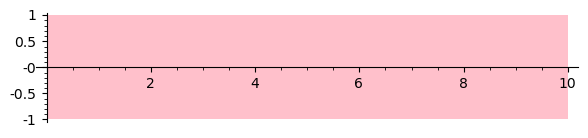

In [51]:
sigG.plot()

## Context signal (masked)

In [52]:
sigG = G(RIF(1, 1.1), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
         ).signal_for_system(vf, v3, 10, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
initials = (1.1?, 5.?)
Computed 148 flowpipes in 0.7152132260962389 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 11.102000000000003], [[1.0000000000000000 .. 11.102000000000003]])
mask for ctx = Mask([0.0000000000000000 .. 11.102000000000003], [[1.0000000000000000 .. 11.102000000000003]])
mask = Mask([0.0000000000000000 .. 11.102000000000003], [[1.0000000000000000 .. 11.102000000000003]])
mask = Mask([0.0000000000000000 .. 11.102000000000003], [[1.0000000000000000 .. 11.102000000000003]])
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5727943631722219], [-0.18566626515230495 .. 2.0609029880732562]

Computed 13 flowpipes in 0.0710067930049263 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_doma

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1624349353751417 .. 1.5313517111745750], [0.013325155654575482 .. 1.5862633433717533]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 1.?)]
Computed 11 flowpipes in 0.07895958103472367 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f04024c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 

Computed 7 flowpipes in 0.04374051000922918 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_doma

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1369554408584487 .. 1.3574558536808775], [-0.16532227837489025 .. 0.76671280931711306]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 6 flowpipes in 0.038876743987202644 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 

Computed 6 flowpipes in 0.035259019990917295 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_dom

Computed 3 flowpipes in 0.026954161003232002 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_dom

Computed 3 flowpipes in 0.02790456503862515 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]])
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .. 0.20600000000000002]]))
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_doma

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0665857356041090 .. 1.2170192407481475], [-0.13473781896829524 .. 0.37013410229972732]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
initials = [(0.1?, 2.?), (None, 0.?)]
Computed 3 flowpipes in 0.02659720100928098 sec
In G.signal
mask for G = Mask([0.0000000000000000 .. 0.20600000000000002], [[0.0000000000000000 .

limit_output extension: Maximum message size of 100000 exceeded with 103105 characters

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


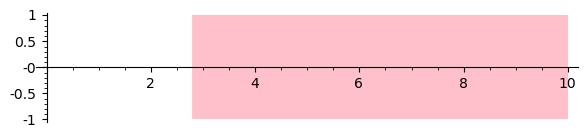

In [53]:
sigG.plot()

In [54]:
csigG = G(RIF(1, 1.1), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
          ).context_signal_for_system(vf, v3, 10, use_masks=True, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f019eaf0>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f62f0241a30>, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f01ac0a0>
setting reach level to 0
====> reach_tree coordinate ()
==> reach_tree call at [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]]
initials = (1.1?, 5.?)
context loop 0, 0
ctx
zero width static set [0.0..0.0]
poly 1,0 = b'(([1.0000000000 , 1.0000000000] * c0))'
context loop 1, 0
ctx
zero width static set [0.0..0.0]
poly 2,0 = b'(([1.0000000000 , 1.0

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9700>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

PolyObserver((([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2)), <flowstar.reachability.Reach object at 0x7f62f3bc9940>, (([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^2) + ([-0.1000000001 , -0.1000000000] * y^3) + ([3.2000000000 , 3.2000000001] * x * y^2) + ([-1.0800000001 , -1.0799999999] * x^2 * y) + ([-1.2000000000 , -1.1999999999] * x^3) + ([-4.0000000000 , -4.0000000000] * x^2 * y^2) + ([0.5999999999 , 0.6000000000] * x^3 * y)), symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^2) + ([-0.1000000001 , -0.1000000000]

limit_output extension: Maximum message size of 100000 exceeded with 103790 characters

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


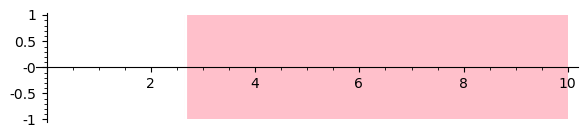

In [55]:
csigG.signal.plot()

In [56]:
csigG.refined_signal(1).plot()

 ==> creating ContextSignal with coord=(0,), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f019eaf0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f0168ac0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 11.102000000000001], [[1.0000000000000000 .. 3.8163124999999996]])
parent_signal = Signal([0.0000000000000000 .. 11.102000000000001], [([0.0000000000000000 .. 0.086734375000000003], True), ([3.8163124999999995 .. 11.102000000000001], False)], mask=None)
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99938562762067362 .. 1.3844319636599350], [-0.033154973963680647 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
Generating Reach T

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99998486618648063 .. 1.3844319636599350], [0.53396913750818597 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000000000000, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f021bcc0>, print_timings=False, initia

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

top-level root detection: 1 items in 0.10 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None, ctx_mask=None
Monitoring initial signal: 1 items in 0.18 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7f62f00e94f0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
(ContextSignal([0.0000000000000000 .. 0.004000000000

var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^2) + ([-0.1000000001 , -0.1000000000] * y^3) + ([3.2000000000 , 3.2000000001] * x * y^2) + ([-1.0800000001 , -1.0799999999] * x^2 * y) + ([-1.2000000000 , -1.1999999999] * x^3) + ([-4.0000000000 , -4.0000000000] * x^2 * y^2) + ([0.5999999999 , 0.6000000000] * x^3 * y))'
PolyObserver((([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2)), <flowstar.reachability.Reach object at 0x7f62f3bc9700>, (([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc95e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None, ctx_mask=None
Monitoring initial signal: 1 items in 0.11 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7f62f00f71f0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
(ContextSignal([0.0000000000000000 .. 0.004000000000

limit_output extension: Maximum message size of 100000 exceeded with 110792 characters

In [57]:
csigG = G(RIF(1, 1.1), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
          ).context_signal_for_system(vf, v3, 10, use_masks=True, refine=1, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f02e20d0>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f62f0274eb0>, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f0241be0>
setting reach level to 0
====> reach_tree coordinate ()
==> reach_tree call at [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]]
initials = (1.1?, 5.?)
context loop 0, 0
ctx
zero width static set [0.0..0.0]
poly 1,0 = b'(([1.0000000000 , 1.0000000000] * c0))'
context loop 1, 0
ctx
zero width static set [0.0..0.0]
poly 2,0 = b'(([1.0000000000 , 1.0

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

limit_output extension: Maximum message size of 100000 exceeded with 112184 characters

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


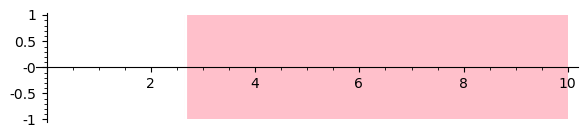

In [58]:
csigG.refined_signal(0).plot()

In [59]:
csigG.refined_signal(1).plot()

 ==> creating ContextSignal with coord=(0,), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f02e20d0>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f027c670>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 11.102000000000001], [[1.0000000000000000 .. 3.7295781249999998]])
parent_signal = Signal([0.0000000000000000 .. 11.102000000000001], [([0.0000000000000000 .. 0.086734375000000003], True), ([3.7295781249999997 .. 11.102000000000001], False)], mask=None)
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99938562762067362 .. 1.3844319636599350], [-0.033154973963680647 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
Generating Reach T

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f0402ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

limit_output extension: Maximum message size of 100000 exceeded with 123649 characters

In [60]:
csigG = G(RIF(1, 1.1), ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)),
          ).context_signal_for_system(vf, v3, 10, use_masks=True, refine=2, **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f027e160>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f62f042e880>, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f23600a0>
setting reach level to 0
====> reach_tree coordinate ()
==> reach_tree call at [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]]
initials = (1.1?, 5.?)
context loop 0, 0
ctx
zero width static set [0.0..0.0]
poly 1,0 = b'(([1.0000000000 , 1.0000000000] * c0))'
context loop 1, 0
ctx
zero width static set [0.0..0.0]
poly 2,0 = b'(([1.0000000000 , 1.0

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f205a820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

fprime = (([-1.2000000000 , -1.1999999999] * x) + ([-0.1000000001 , -0.1000000000] * y^2) + ([0.4799999999 , 0.4800000001] * x * y) + ([2.3999999999 , 2.4000000000] * x^2) + ([-0.1000000001 , -0.1000000000] * y^3) + ([3.2000000000 , 3.2000000001] * x * y^2) + ([-1.0800000001 , -1.0799999999] * x^2 * y) + ([-1.2000000000 , -1.1999999999] * x^3) + ([-4.0000000000 , -4.0000000000] * x^2 * y^2) + ([0.5999999999 , 0.6000000000] * x^3 * y))
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f630a335d60>
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None, ctx

PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f3bc9ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.2000000000 , -1.1999999999]

limit_output extension: Maximum message size of 100000 exceeded with 126591 characters

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


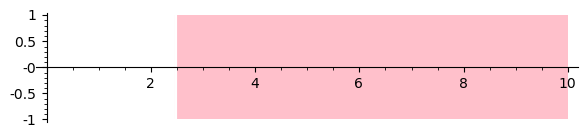

In [61]:
csigG.refined_signal(0).plot()

In [62]:
csigG.refined_signal(1).plot()

 ==> creating ContextSignal with coord=(0,), signal = <function C.context_signal.<locals>.signal_fn at 0x7f62f027e160>, reach_tree = None, ctx_mask=<lbuc.context_masks.ContextMask object at 0x7f62f010cbe0>
performing downtree_masking
mask = Mask([0.0000000000000000 .. 11.102000000000001], [[1.0000000000000000 .. 3.5561093750000002]])
parent_signal = Signal([0.0000000000000000 .. 11.102000000000001], [([0.0000000000000000 .. 0.086734375000000003], True), ([3.5561093750000001 .. 11.102000000000001], False)], mask=None)
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99938562762067362 .. 1.3844319636599350], [-0.033154973963680647 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
Generating Reach T

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f02d3940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=False, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
var_names = [b'local_t', b'x', b'y']
res = b'(([0.8000000000 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x) + ([1.0000000000 , 1.0000000000] * y^2) + ([1.0000000000 , 1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.200000

restricted=System(R, (x, y), [[0.99998486618648063 .. 1.3844319636599350], [-0.033154973963680647 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.062500000000000000 .. 0.075000000000000012], None]))
initials = [(0.07?, 1.?), (None, 0.?e1)]
context loop 0, 0
ctx
static 2
poly 1,1 = b'(([1.0000000000 , 1.0000000000] * s0) + ([1.0000000000 , 1.0000000000] * c0))'
context loop 1, 1
no ctx
static 3
poly 1,2 = b'(([1.0000000000 , 1.0000000000] * s1))'
contexts = ['[0.0625..0.07500000000000001]']
statics  = ['[0.9999848661864806..1.384431963659935]', '[-0.033154973963680646..5.000113342080666]']
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62f02d34c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.20000000000

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99998486618648063 .. 1.3844319636599350], [0.0099400430943981932 .. 5.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y})), y0_ctx=[[0.050000000000000002 .. 0.10000000000000001], None]))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000000000000, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f62f0333680>, print_timings=False, init

limit_output extension: Maximum message size of 100000 exceeded with 108415 characters

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

In [ ]:
sig.plot()

In [ ]:
{x: 1, y: 2}

In [ ]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [ ]:
sorted(kxs)

In [ ]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])